#Importing Libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the Data from CSV file

In [181]:
df=pd.read_csv('/cardio_data.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [183]:
df.isnull().sum()

,0
date,0
country,0
id,0
active,0
age,0
alco,0
ap_hi,0
ap_lo,0
cholesterol,0
gender,0


In [184]:
df.columns

Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease'],
      dtype='object')

# Analyzing Numerical Columns

In [185]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


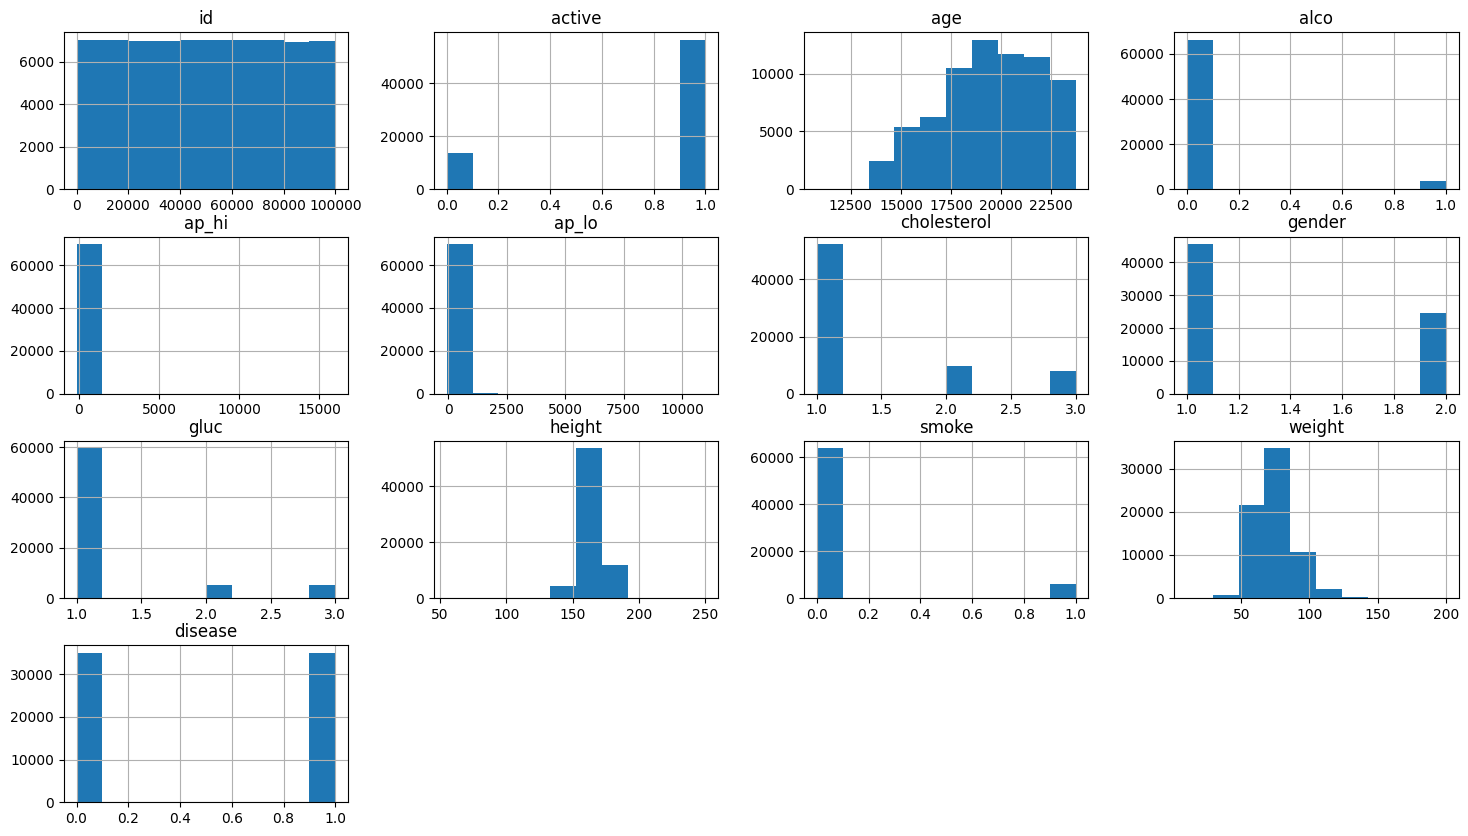

In [186]:
df.hist( figsize = (18, 10) )
plt.show()

In [187]:
df["disease"].value_counts()

,count
disease,
0,35021
1,34979


# Correlation Matrix

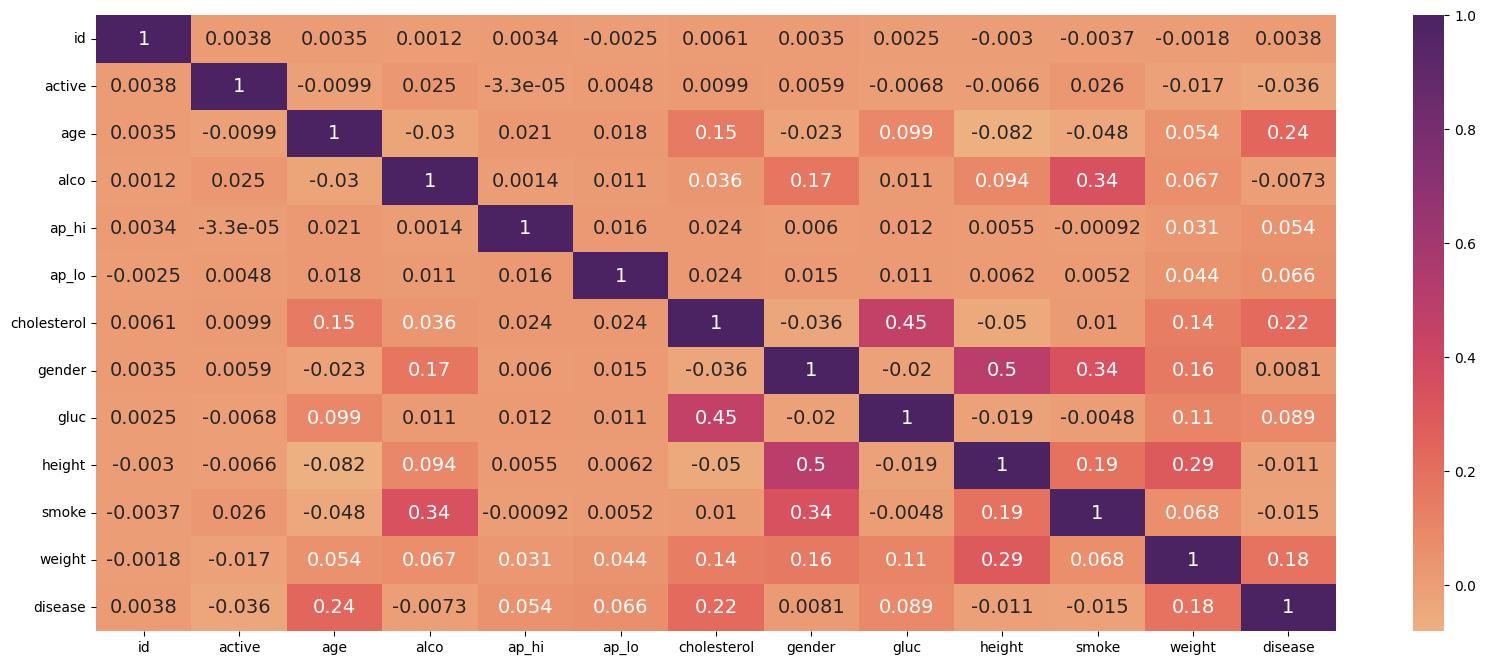

In [188]:
fig, ax = plt.subplots( figsize = (20,8) )
corr_matrix = df.corr(numeric_only=True) # Add numeric_only=True to handle non-numeric columns
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

# Analyzing Categorical Features

In [189]:
# Now, we proceed with the analysis of categorical features.
def categorical_valcount_hist(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

country
Singapore    17671
Indonesia    17501
Malaysia     17426
India        17402
Name: count, dtype: int64


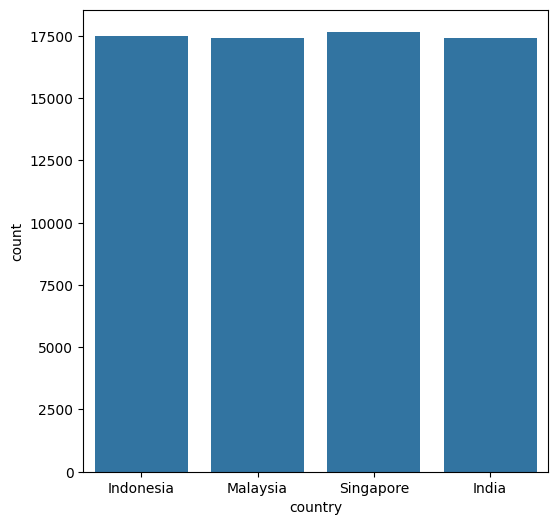

In [190]:
# First, we check the count of country .
categorical_valcount_hist("country")

active
1    56261
0    13739
Name: count, dtype: int64


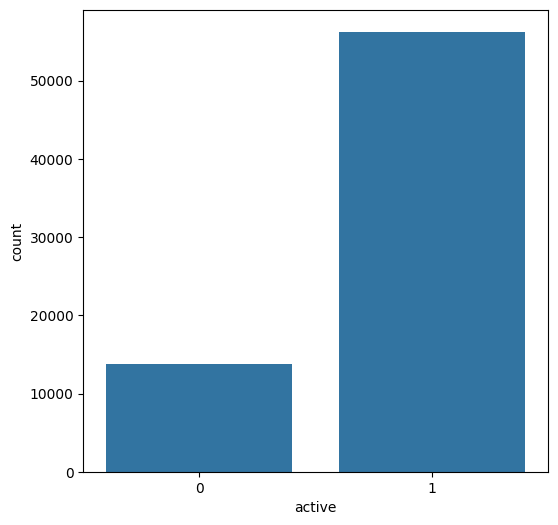

In [191]:
# Now, we check the count of active .
categorical_valcount_hist("active")

In [192]:
# Now, let us check the count of age .
print( "age:", len( df["age"].unique() ) )
print()
print( df["age"].value_counts() )

age: 8076

age
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: count, Length: 8076, dtype: int64


alco
0    66236
1     3764
Name: count, dtype: int64


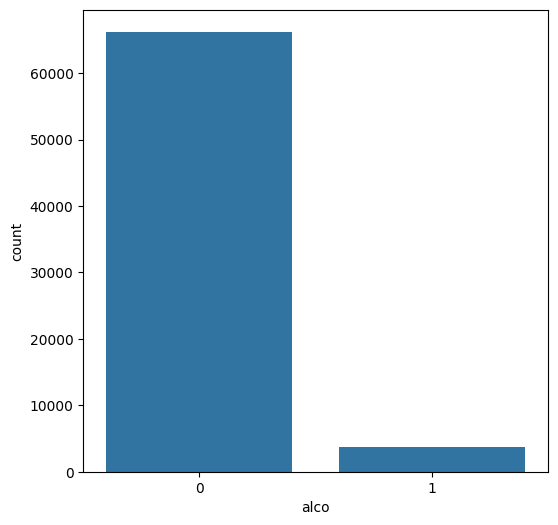

In [193]:
# Now, let us check the count of alco .
categorical_valcount_hist("alco")

In [194]:
# Now, let us check the count of ap_hi  .
print( "ap_hi:", len( df["ap_hi"].unique() ) )
print()
print( df["ap_hi"].value_counts() )

ap_hi: 153

ap_hi
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: count, Length: 153, dtype: int64


In [195]:
# Now, let us check the count of ap_lo  .
print( "ap_lo:", len( df["ap_lo"].unique() ) )
print()
print( df["ap_lo"].value_counts() )

ap_lo: 157

ap_lo
80     34847
90     14316
70     10245
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: count, Length: 157, dtype: int64


cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


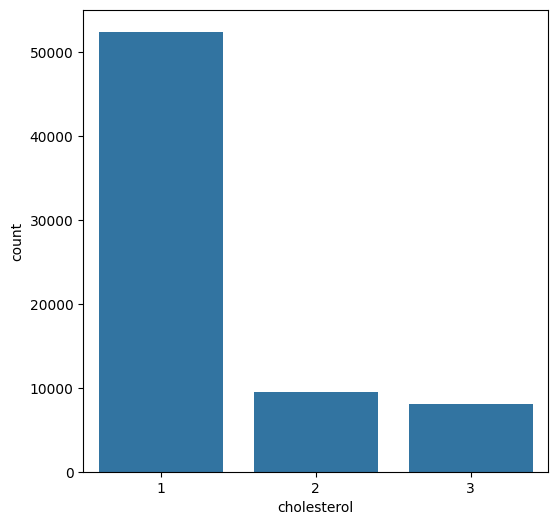

In [196]:
# Now, let us check the count of cholesterol .
categorical_valcount_hist("cholesterol")

gender
1    45530
2    24470
Name: count, dtype: int64


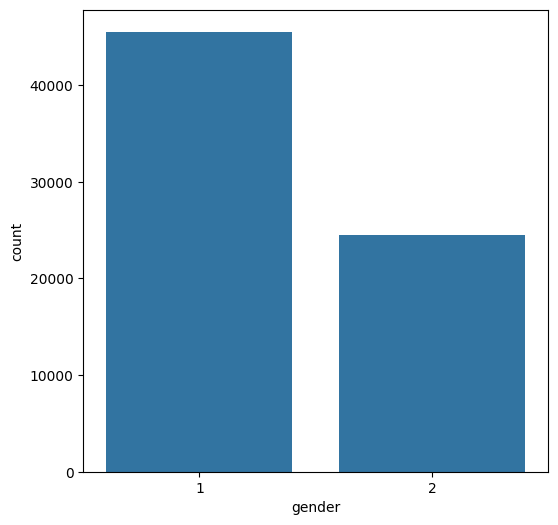

In [197]:
# Now, let us check the count of gender .
categorical_valcount_hist("gender")

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64


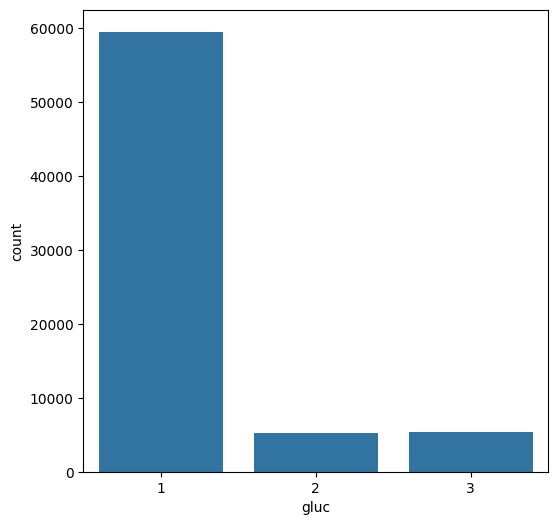

In [198]:
# Now, let us check the count of gluc .
categorical_valcount_hist("gluc")

In [199]:
# Now, let us check the count of height   .
print( "height:", len( df["height"].unique() ) )
print()
print( df["height"].value_counts() )

height: 109

height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: count, Length: 109, dtype: int64


In [200]:
# Now, let us check the count of occupation   .
print( "occupation:", len( df["occupation"].unique() ) )
print()
print( df["occupation"].value_counts() )

occupation: 9

occupation
Nurse         7905
Accountant    7879
Architect     7869
Others        7813
Lawyer        7753
Chef          7723
Engineer      7707
Teacher       7683
Doctor        7668
Name: count, dtype: int64


smoke
0    63831
1     6169
Name: count, dtype: int64


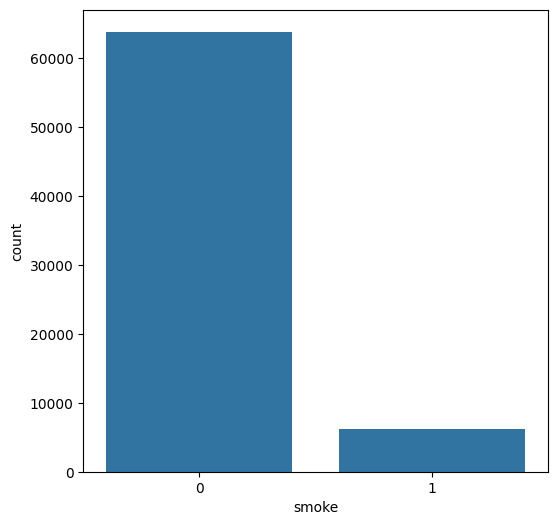

In [201]:
# Now, let us check the count of smoke .
categorical_valcount_hist("smoke")

In [202]:
# Now, let us check the count of weight   .
print( "weight:", len( df["weight"].unique() ) )
print()
print( df["weight"].value_counts() )

weight: 287

weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: count, Length: 287, dtype: int64


disease
0    35021
1    34979
Name: count, dtype: int64


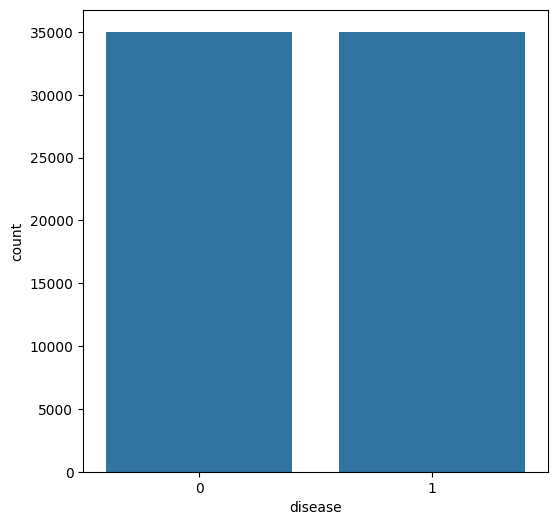

In [203]:
# Now, let us check the count of disease .
categorical_valcount_hist("disease")

# Data Analysis

<Axes: xlabel='disease', ylabel='country'>

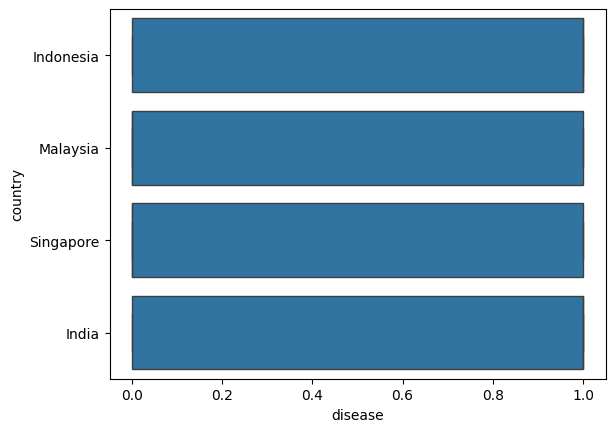

In [204]:
# Data Analysis
# Now, we start with understanding the relationship between the different data features.
sns.boxplot(x ="disease",y="country", data=df)

<Axes: xlabel='active', ylabel='disease'>

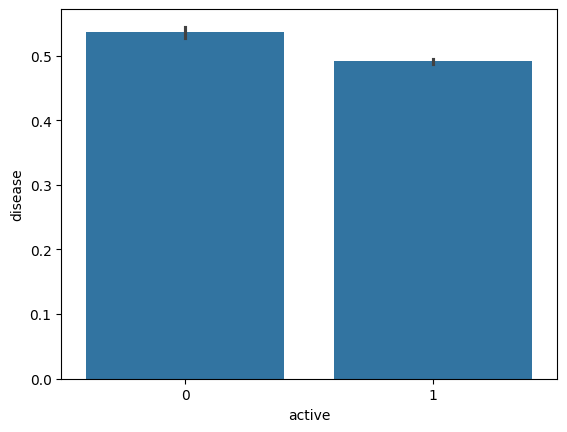

In [205]:
sns.barplot(y ="disease",x="active",data = df)

<Axes: xlabel='disease', ylabel='age'>

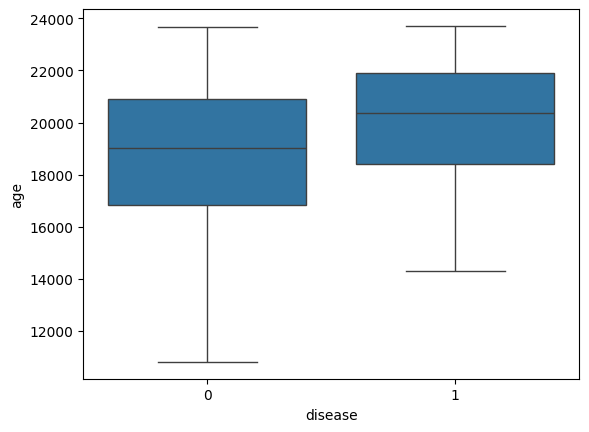

In [206]:
sns.boxplot(x ="disease",y="age",data = df)

<Axes: xlabel='disease', ylabel='alco'>

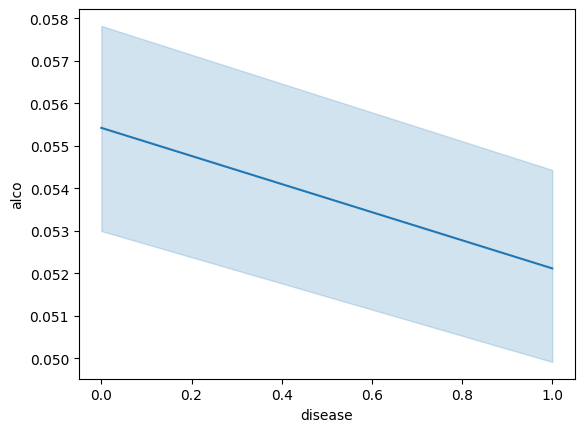

In [207]:
sns.lineplot(x="disease",y="alco",data = df)

<Axes: xlabel='disease', ylabel='ap_hi'>

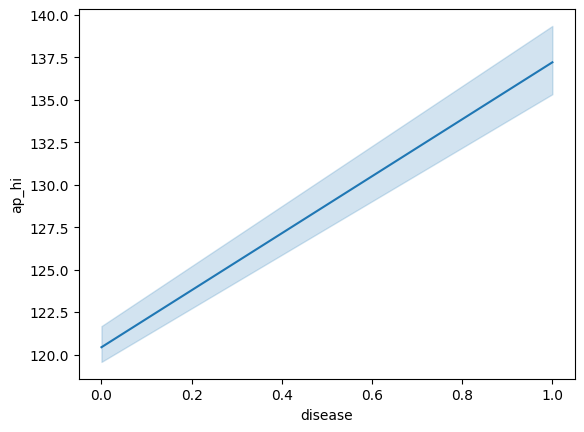

In [208]:
sns.lineplot(x ="disease",y="ap_hi",data = df)

<Axes: xlabel='disease', ylabel='ap_lo'>

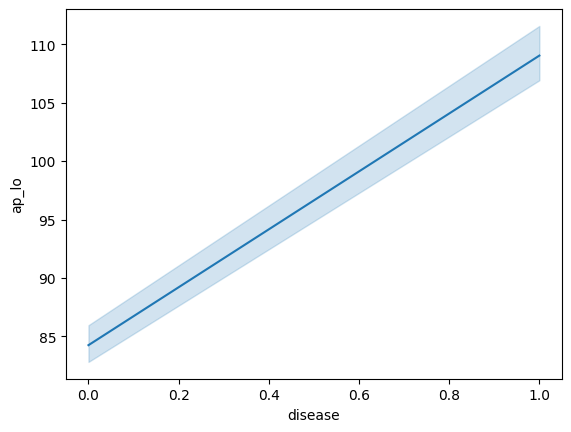

In [209]:
sns.lineplot(x ="disease",y="ap_lo",data = df)

<Axes: xlabel='cholesterol', ylabel='disease'>

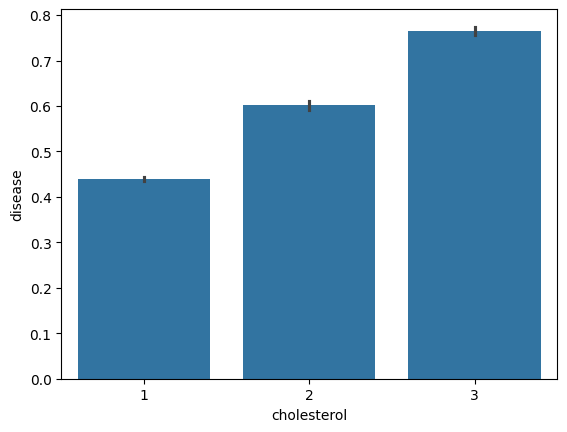

In [210]:
sns.barplot(y ="disease",x="cholesterol",data = df)

<Axes: xlabel='disease', ylabel='cholesterol'>

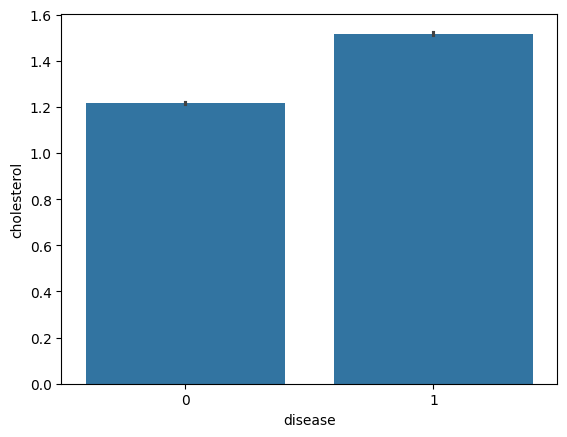

In [211]:
sns.barplot(x ="disease",y="cholesterol",data = df)

<Axes: xlabel='gender', ylabel='disease'>

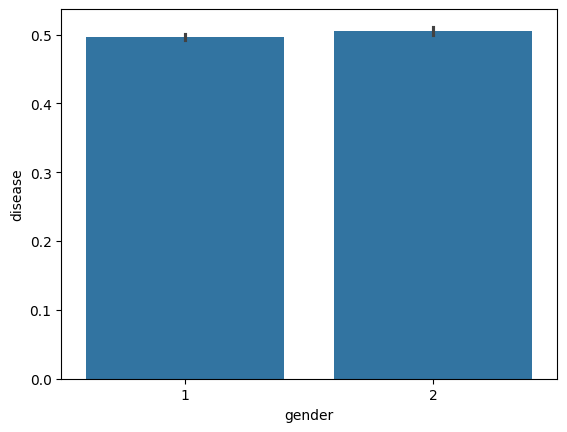

In [212]:
sns.barplot(y ="disease",x="gender",data = df)

<Axes: xlabel='gluc', ylabel='disease'>

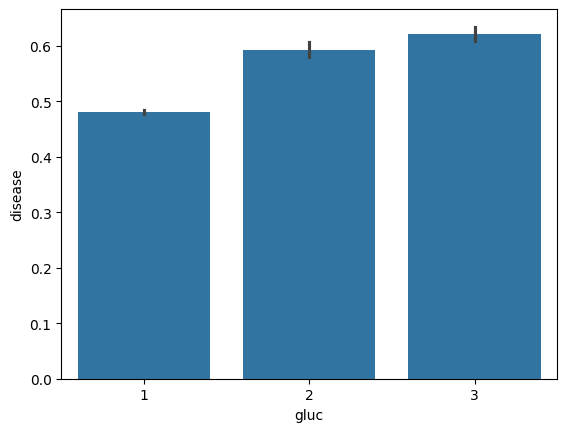

In [213]:
sns.barplot(y ="disease",x="gluc",data = df)

<Axes: xlabel='disease', ylabel='height'>

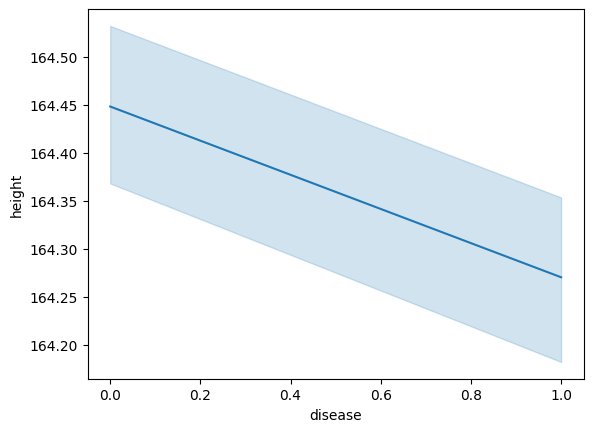

In [214]:
sns.lineplot(x ="disease",y="height",data = df)

<Axes: xlabel='disease', ylabel='occupation'>

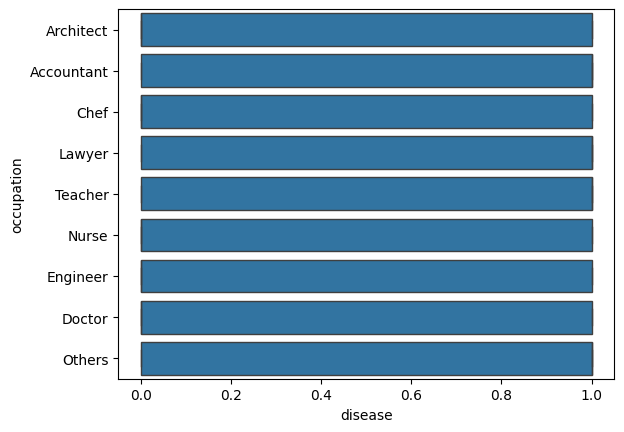

In [215]:
sns.boxplot(x ="disease",y="occupation",data = df)

<Axes: xlabel='smoke', ylabel='disease'>

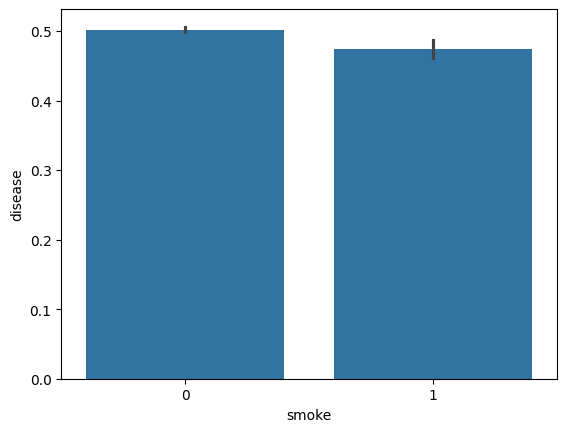

In [216]:
sns.barplot(y ="disease",x="smoke",data = df)

<Axes: xlabel='disease', ylabel='weight'>

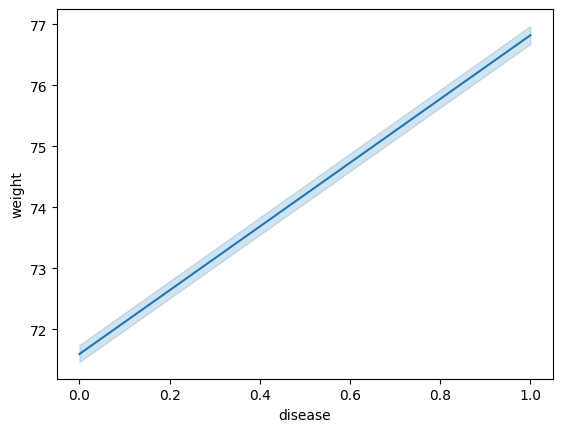

In [217]:
sns.lineplot(x ="disease",y="weight",data = df)

# Encoding

In [218]:
from sklearn.preprocessing import LabelEncoder
obj_list = ['disease', 'date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight']
le = LabelEncoder()
for obj in obj_list:
        df[obj] = le.fit_transform(df[obj].astype(str))

# Train-Test Split

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.drop('disease', axis=1)
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Algorithm Implementation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.6814285714285714
Testing Sensitivity for Logistic Regression: 0.6770419426048565
Testing Specificity for Logistic Regression: 0.6861374407582939
Testing Precision for Logistic Regression: 0.6983946259820107


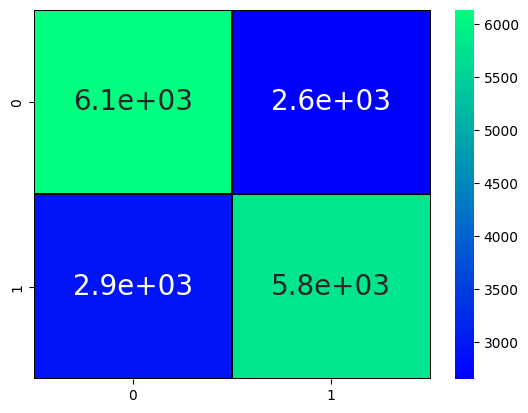

In [220]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8783
           1       0.69      0.66      0.68      8717

    accuracy                           0.68     17500
   macro avg       0.68      0.68      0.68     17500
weighted avg       0.68      0.68      0.68     17500



73.11
Testing Accuracy for Random Forest: 0.7311428571428571
Testing Sensitivity for Random Forest: 0.7154024931333193
Testing Specificity for Random Forest: 0.7496888225043565
Testing Precision for Random Forest: 0.7710349538881931


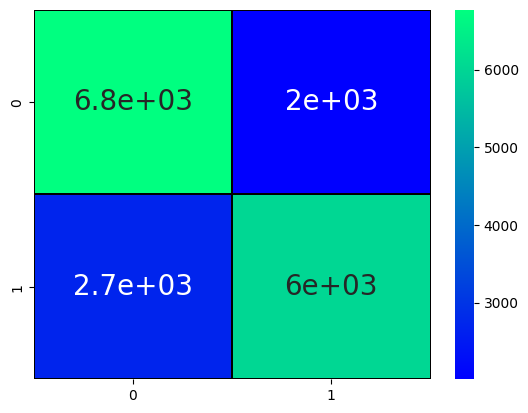

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [223]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      8783
           1       0.75      0.69      0.72      8717

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8783
           1       0.73      0.73      0.73      8717

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

Testing Accuracy for Decision Tree: 0.7296
Testing Sensitivity for Decision Tree: 0.7298831006696175
Testing Specificity for Decision Tree: 0.7293129243871562
Testing Precision for Decision Tree: 0.7322099510417852


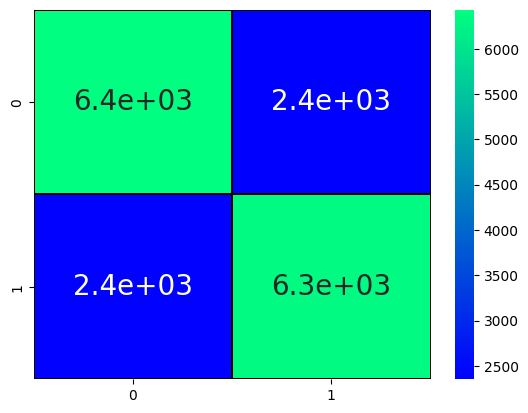

In [224]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

# Conclusion

In [225]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = df.drop('disease', axis=1)
y = df['disease']
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Step 3: Initialize models
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Step 4: Train the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Step 5: Make predictions on both training and testing sets
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model
}

# Step 6: Evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Testing performance
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    return {
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1 Score": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    }

# Step 7: Compare models
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Step 8: Display results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Step 9: Determine the best model based on test accuracy and other metrics
best_model = results_df['Test Accuracy'].idxmax()
print(f"\nThe best model based on Test Accuracy is: {best_model}")

# Detailed classification report for the best model
print(f"\nClassification Report for {best_model}:")
print(classification_report(y_test, models[best_model].predict(X_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Train Accuracy  Train Precision  Train Recall  \
Logistic Regression        0.695733         0.713675      0.654215   
Decision Tree              1.000000         1.000000      1.000000   
Random Forest              1.000000         1.000000      1.000000   

                     Train F1 Score  Test Accuracy  Test Precision  \
Logistic Regression        0.682653       0.693086        0.708085   
Decision Tree              1.000000       0.628971        0.627611   
Random Forest              1.000000       0.727029        0.738904   

                     Test Recall  Test F1 Score  
Logistic Regression     0.653092       0.679477  
Decision Tree           0.627395       0.627503  
Random Forest           0.698979       0.718387  

The best model based on Test Accuracy is: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      8783
           1       0.74      0